#    HR ATTRITION Classifier

## Importing libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the data file

In [77]:
data = pd.read_excel('Hr_Data.xlsx')

In [78]:
pd.options.display.max_columns = None


## Understanding data - EDA


In [79]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [80]:
data.shape

(1470, 35)

Above we see there are 35 columns/ features and 1470 rows of data

In [81]:
data.size

51450

The info, will give the information of the dataset we have in hand.

We can see how many rows and columns are there in the dataset and feature is the target column too

We can understan the null values in the data and the types of data in hand too

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Here from above we see there are:

   #### 1. No of columns - 35
   #### 2. No of rows - 1470
   #### 3. Data types - both numerical and chategorical data is available (numerical - 26 columns and chategorical - 9 columns)
   #### 4. No of null values/missing data - None

#### Let us recheck regarding the missing values once 

In [83]:
# we can check the sum of null values using this
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## DEALING WITH CHATEGORICAL DATA

#### The chategorical columns available in the dataset are:
1. Attrition 
2. Buisness Travel
3. Department
4. EducationalField
5. Gender
6. Job Role
7. Martial status
8. Overtime
9. Over18


In [84]:
chat_data = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Over18']
df1 = data[chat_data]

In [85]:
df1.nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
Over18            1
dtype: int64

In [86]:
df1.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Over18
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,Y
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,Y
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,Y
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,Y
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,Y


### Here above we can identify the types of chategorical data
1. Attrition  - Nominal
2. BusinessTravel - nominal
3. Department - nominal
4. EducationalField - nominal
5. Gender - nominal 
6. Job Role - nominal
7. Martial status - nomimal
8. Overtime - nominal
9. Over18 - nominal

### While factorizing comparing the data we see:

1. Attrition -:  Yes = 0, No = 1
2. Gender -:     male = 1, female = 0
3. Overtime-:    Yes = 0, No = 1


## Treating the nominal data

In [87]:
df2 =  ['Attrition','Gender','Department','BusinessTravel','OverTime','EducationField','JobRole','MaritalStatus']
nom_data = data[df2]

In [88]:
data_new = pd.get_dummies(nom_data, drop_first=True)

In [89]:
data = data.drop(df2, axis =1)

In [90]:
data = pd.concat([data, data_new], axis = 1)

In [91]:
data.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Gender_Male,Department_Research & Development,Department_Sales,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,OverTime_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,Y,11,3,1,80,0,8,0,1,6,4,0,5,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,Y,23,4,4,80,1,10,3,3,10,7,1,7,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,Y,15,3,2,80,0,7,3,3,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,Y,11,3,3,80,0,8,3,3,8,7,3,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,Y,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


### We can see there are no more chategorical data left

In [92]:
data.shape

(1470, 49)

### There is a change in the shape though. 

#### Prior it was 35 features now it has become 49 features. The no of features have increased as we have used sparse matrix for nominal data

In [93]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Gender_Male,Department_Research & Development,Department_Sales,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,OverTime_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224,0.600000,0.653741,0.303401,0.188435,0.709524,0.282993,0.412245,0.108163,0.315646,0.055782,0.089796,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863,0.490065,0.475939,0.459884,0.391193,0.454137,0.450606,0.492406,0.310692,0.464931,0.229579,0.285986,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000,1.000000,1.000000,1.

Comparing the mean and median values we can check if there is any outliers in the data and accordingly deal with it
Here we see small differnce in mean and median in all the other columns
Whereas in MonthlyINcome column the differnce is higger

Lets plot therir box plots and check for outliers.

<AxesSubplot:>

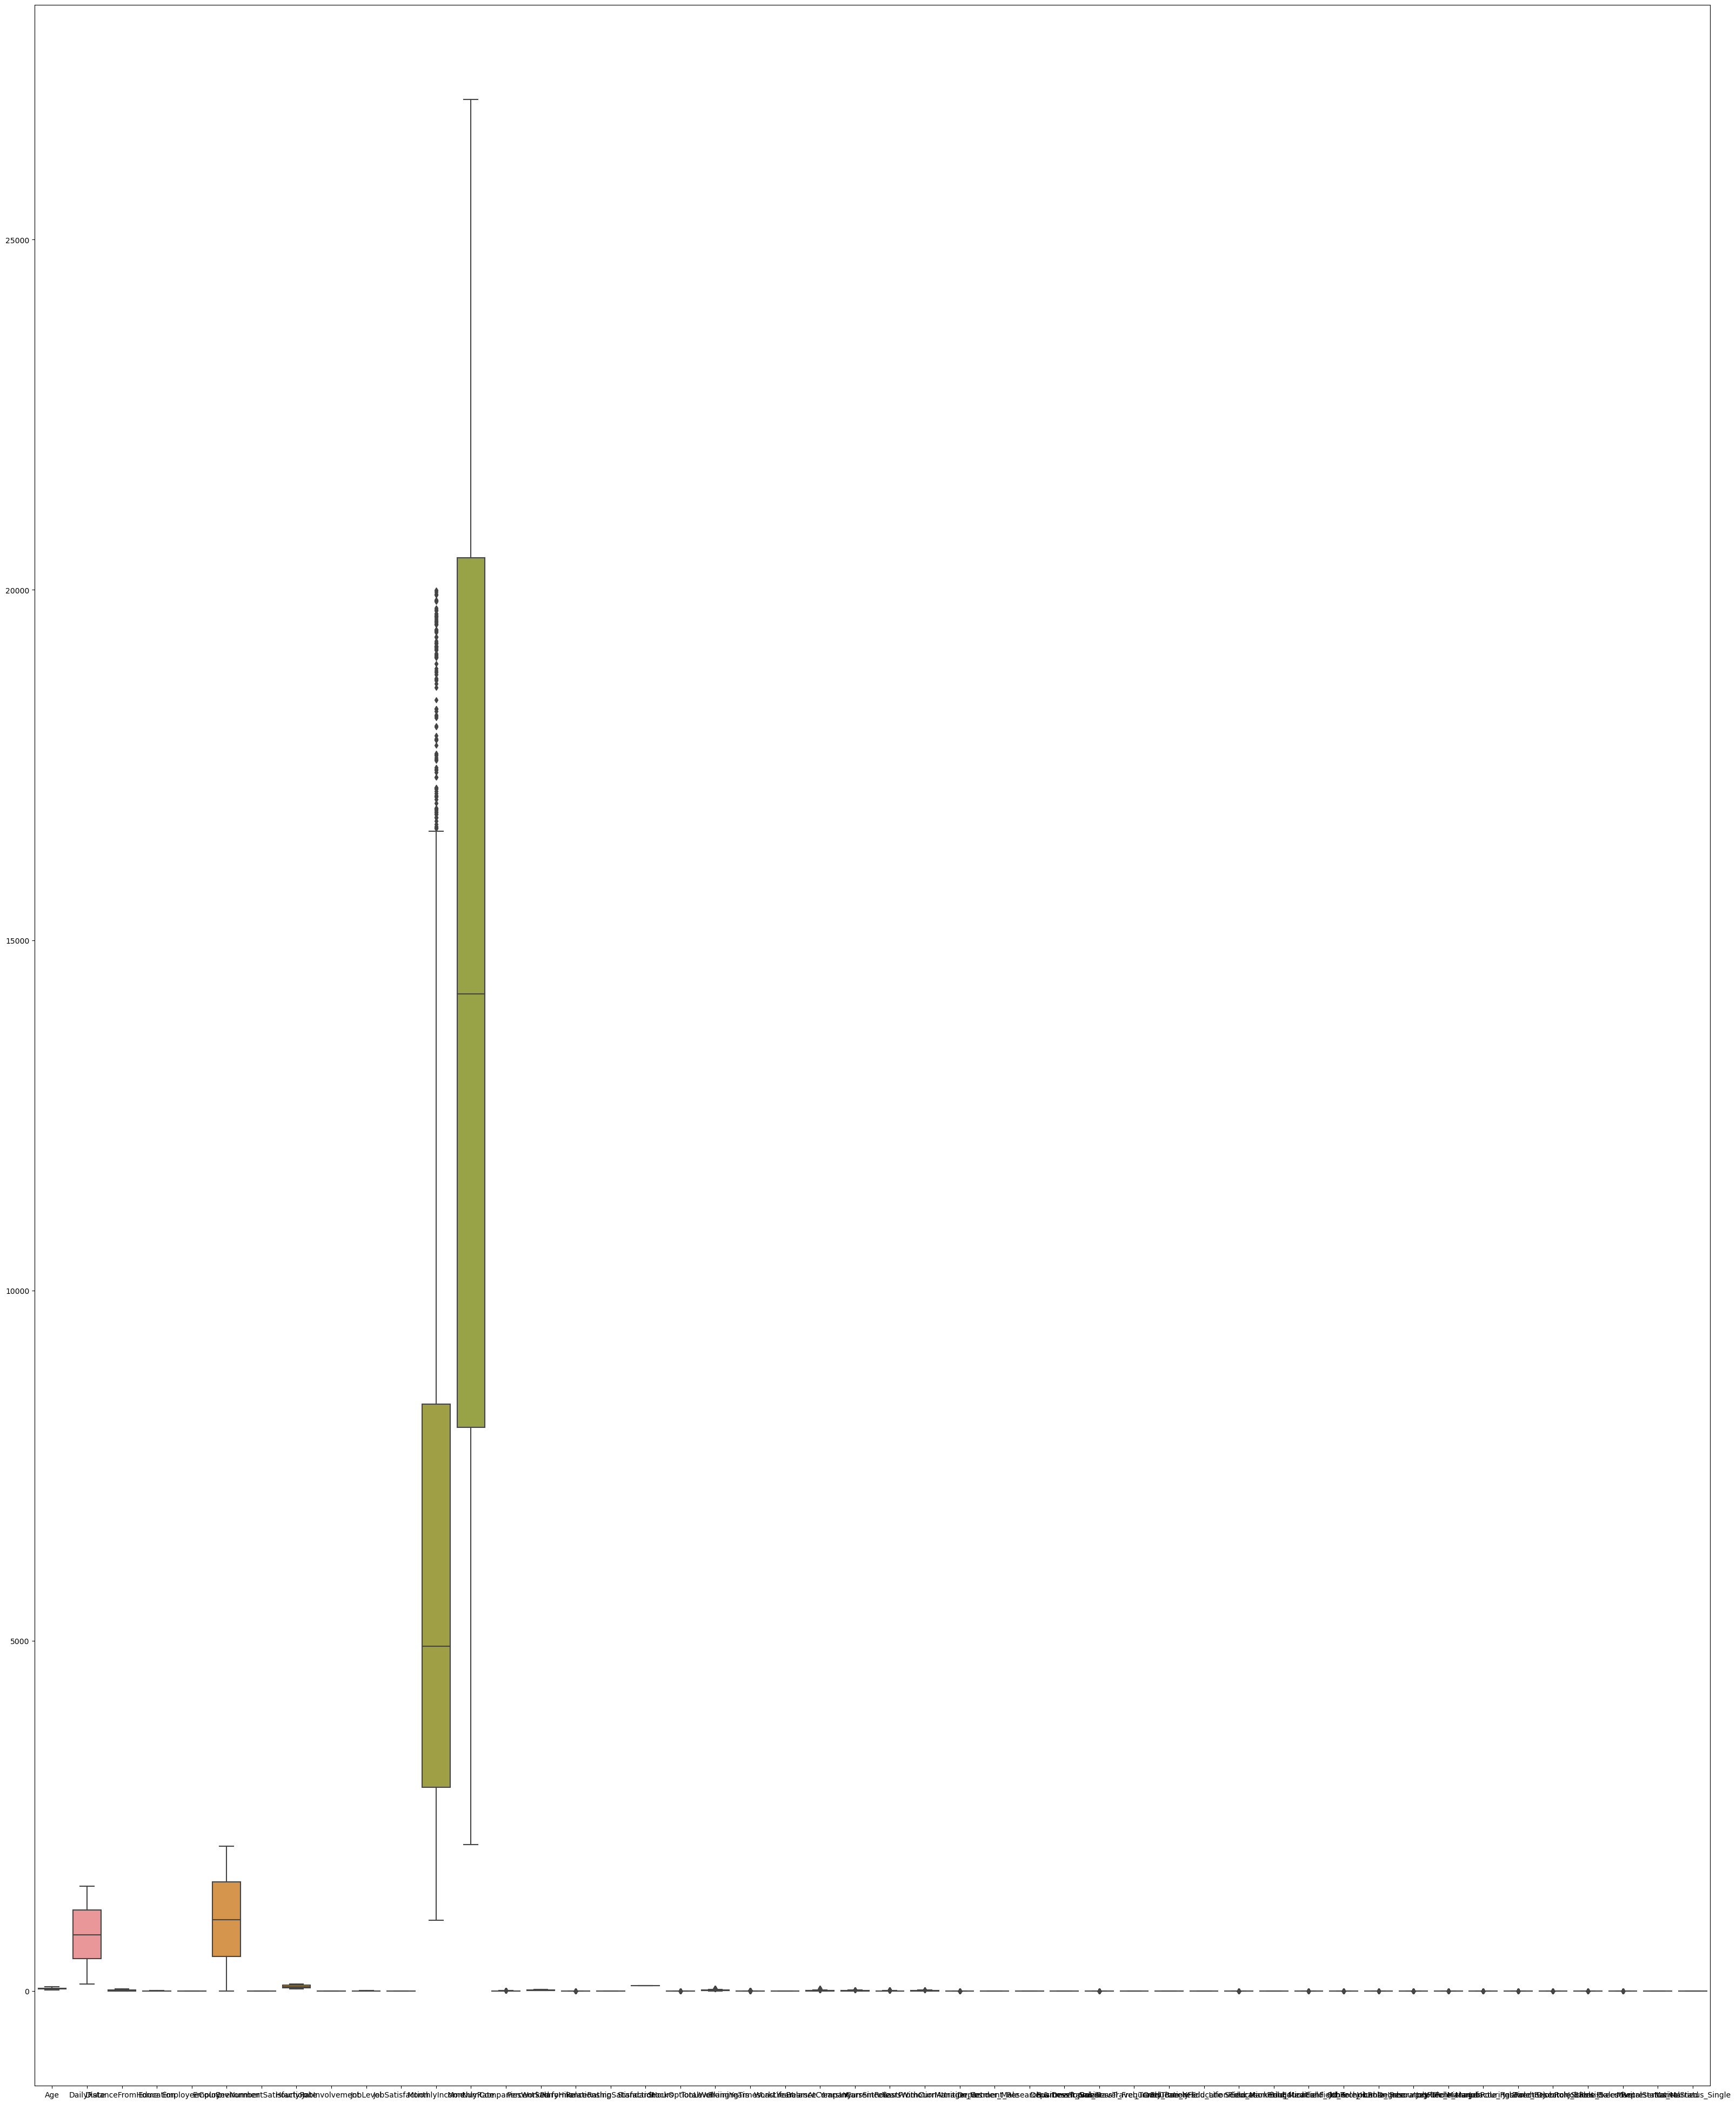

In [94]:
plt.figure(figsize=(40,50))
sns.boxplot(data = data)

As there are many columns understanding the full data boxplot is difficult, so we can try to see the ones Which could have outliers

We can try plotting box plot for each and every features and check which have outliers

##### Here I have plottled boxplot for each and every feature and kept the once with outlier intact

<AxesSubplot:>

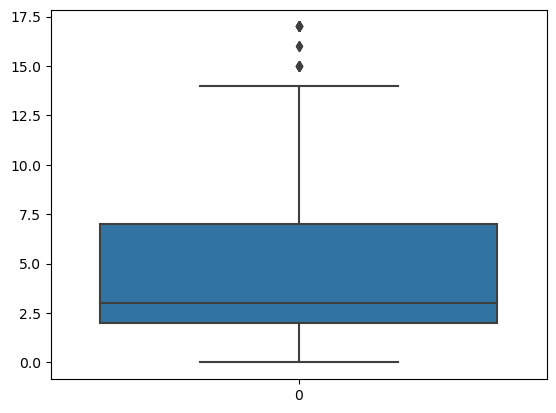

In [95]:
sns.boxplot(data = data['YearsWithCurrManager'])

<AxesSubplot:>

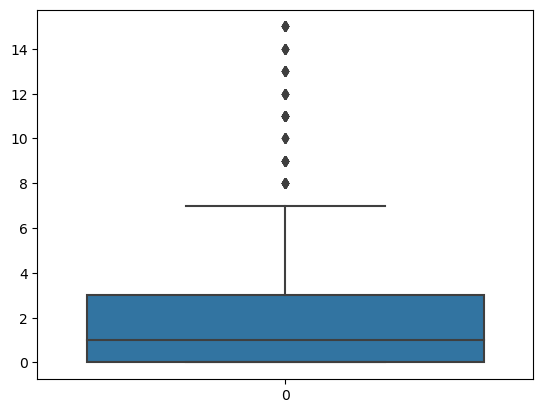

In [96]:
sns.boxplot(data = data['YearsSinceLastPromotion'])

<AxesSubplot:>

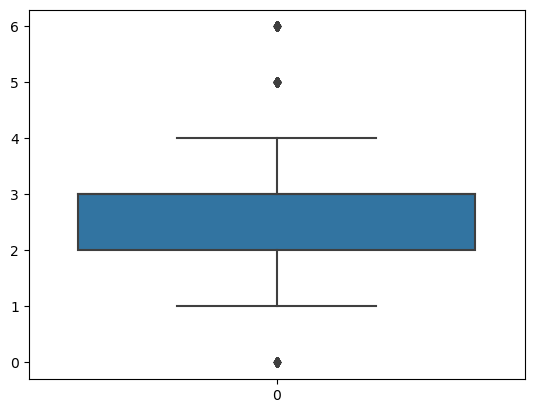

In [97]:
sns.boxplot(data = data['TrainingTimesLastYear'])

<AxesSubplot:>

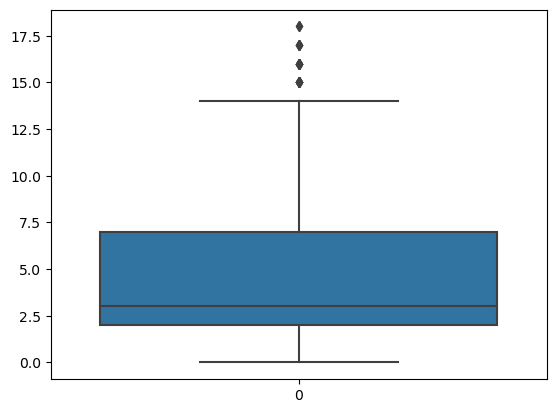

In [98]:
sns.boxplot(data = data['YearsInCurrentRole'])

<AxesSubplot:>

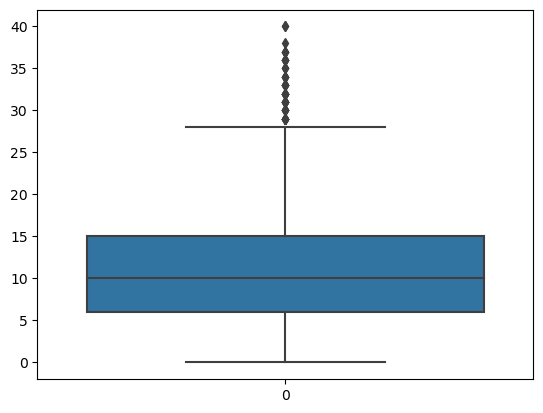

In [99]:
sns.boxplot(data = data['TotalWorkingYears'])

<AxesSubplot:>

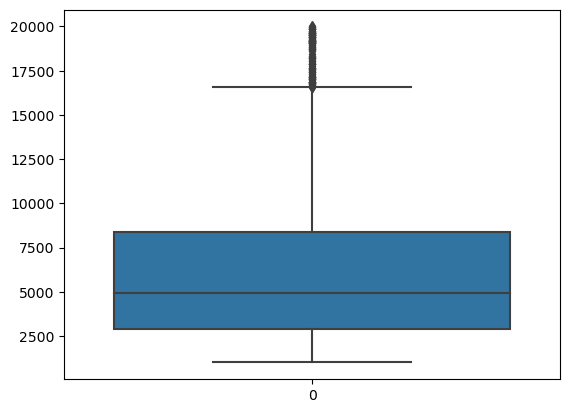

In [100]:
sns.boxplot(data = data['MonthlyIncome'])

<AxesSubplot:>

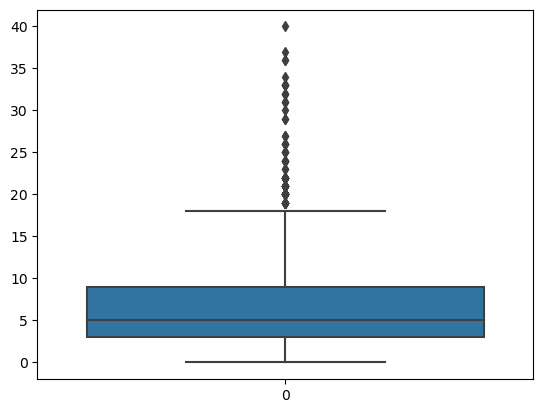

In [101]:
sns.boxplot(data = data['YearsAtCompany'])

Here we see 'MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager' are columns with outliers

To deal with them we will create a set of these columns first and then replacing the outliers with medians.

In [102]:
outliers = ['MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',]
outlier = data[outliers]

We have created a for loop here so that we can apply the same on all the features

In [103]:
for cols in outlier:
    if data[cols].dtype == object:
        continue
    else:
        Q1 = data[cols].quantile(q=0.25)
        Q3 = data[cols].quantile(q=0.75)
        iqr = Q3-Q1
        
        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        
        data.loc[(data[cols]<low) | (data[cols]>high),cols] = data[cols].median()

## FEATURE REDUCTION AND SELECTION

### FEATURE REDUCTION

We can see the relation between different features, by finding the coorelation

In [104]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Gender_Male,Department_Research & Development,Department_Sales,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,OverTime_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.354585,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.558491,0.030620,-0.021490,0.129249,0.175883,0.100199,0.183258,-0.159205,-0.036311,0.017883,-0.027549,-0.024743,0.028791,0.028062,0.016824,0.038162,-0.006354,-0.041466,-0.027604,-0.029856,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.083919,-0.119185
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.009291,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.028934,-0.036257,-0.037848,0.002058,0.006121,-0.020074,-0.009974,-0.056652,-0.011716,0.014871,-0.003616,-0.011776,0.002078,0.009135,0.004028,-0.064449,0.034202,-0.003893,0.030869,-0.021156,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.040035,-0.075835
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,0.054061,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.017481,-0.045793,-0.026556,0.012126,0.024946,0.010141,0.003779,0.077924,-0.001851,-0.008117,0.014085,0.005081,-0.020116,0.025514,-0.024499,0.039294,0.013486,-0.007969,-0.014802,-0.024089,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,0.030232,-0.027445
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.120582,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.115141,0.004428,0.009819,0.078148,0.055725,0.035716,0.053826,-0.031373,-0.016547,-0.018604,0.014215,-0.008292,0.004126,-0.020322,0.013184,0.072405,-0.072335,0.038043,-0.026742,-0.005295,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.001865,0.004168
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,0.002886,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.009269,0.037881,0.010309,0.022916,-0.003343,0.015952,0.004505,-0.010577,0.022556,-0.041923,0.015441,-0.007980,-0.007976,-0.024037,-0.000609,-0.014487,-0.008689,0.010432,0.005938,0.067287,-0.019722,-0.035058,-0.014350,-0.013983,-0.017686,0.023263,0.006255,0.053933,-0.035189
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.032796,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.032198,0.020693,0.027627,0.013232,0.042544,0.013544,-0.008105,-0.103369,0.000508,0.027976,-0.025606,-0.012624,0.008496,0.070132,-0.024526,0.000479,-0.021299,0.064602,0.027713,-0.022014,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,-0.022180,0.009035
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0

Here we see 'StandardHours','EmployeeCount', 'Over18' features have NaN values in coorelation.

It could be because it has only one values or maybe all the values are same, so there is no coorelation

Lets check all the unique values of each feature to confirm this...

In [105]:
data.nunique()

Age                                    43
DailyRate                             886
DistanceFromHome                       29
Education                               5
EmployeeCount                           1
EmployeeNumber                       1470
EnvironmentSatisfaction                 4
HourlyRate                             71
JobInvolvement                          4
JobLevel                                5
JobSatisfaction                         4
MonthlyIncome                        1238
MonthlyRate                          1427
NumCompaniesWorked                     10
Over18                                  1
PercentSalaryHike                      15
PerformanceRating                       2
RelationshipSatisfaction                4
StandardHours                           1
StockOptionLevel                        4
TotalWorkingYears                      29
TrainingTimesLastYear                   4
WorkLifeBalance                         4
YearsAtCompany                    

Here we see that 'StandardHours','EmployeeCount', 'Over18' have only one data:

   1. StandardHours - time that every employee has to work - 80hours
   2. EmployeeCount - count of the emloyee with that id - 1 (its basic knowledge that emplyee with speciifc employee Id will be one only, if more than that that could be            some issue with system or team)
   3. Over18 - the age of employee - all employee will always be over 18 only hence can't have any different value here
    
  #### These columns we see can have only one value, hence we can easily drop them.

In [106]:
to_drop = ['StandardHours','EmployeeCount', 'Over18']
to_drop = data[to_drop]

In [107]:
# Dropping the columns
data.drop(to_drop, axis =1, inplace = True)

In [108]:
data.shape

(1470, 46)

#### Prior the no of features we 49, we see after dropping the features the no of columns have reduced to 46

#### Shifting target column to end, for better access while selecting the data

In [109]:
data1 = data['Attrition_Yes']

In [110]:
data.drop('Attrition_Yes', axis = 1, inplace = True)
data = pd.concat([data,data1], axis = 1)
data.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,Department_Research & Development,Department_Sales,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,OverTime_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition_Yes
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,3,1,6,4,0,5,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeNumber                     1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

##  FEATURE SELECTION (targets and features)
##### Selecting the target and features columns for this dataset

In [112]:
x = data.iloc[:,:45]
y = data.iloc[:,-1]

In [113]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition_Yes, dtype: uint8

## STANDARDIZATION
##### Each data feature is is different ranges 
##### To deal with this we use Standardization
##### Standardization will get data in single range incase of varied data fetures and data types

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.24462499,
        -0.91892141,  1.45864991],
       [ 1.32236521, -1.2977746 , -0.14714972, ..., -0.24462499,
         1.08823234, -0.68556546],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -0.24462499,
        -0.91892141,  1.45864991],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ..., -0.24462499,
         1.08823234, -0.68556546],
       [ 1.32236521,  0.54667746, -0.88751511, ..., -0.24462499,
         1.08823234, -0.68556546],
       [-0.32016256, -0.43256792, -0.14714972, ..., -0.24462499,
         1.08823234, -0.68556546]])

## BALANCING THE TARGET

In [115]:
y.value_counts()

0    1233
1     237
Name: Attrition_Yes, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition_Yes', ylabel='count'>

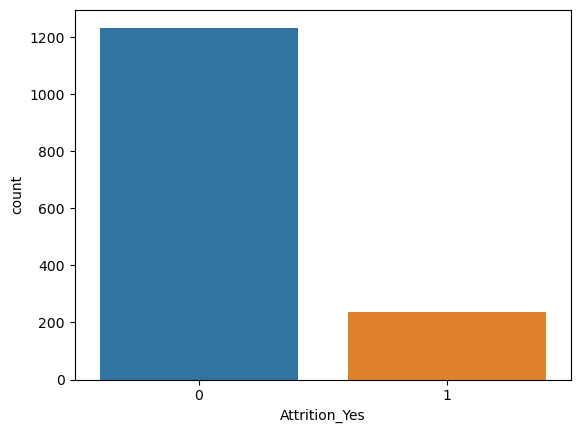

In [116]:
sns.countplot(y)

#### As we can see the target is imbalanced, the number of YES and NO is varying highly
#### Hence to solve this we will use SMOTE here

In [117]:
from collections import Counter
from sklearn.datasets import make_classification

In [118]:
x,y = make_classification(n_samples = 10000, n_features = 2, n_redundant =0, n_clusters_per_class = 1,
                          weights=[0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [119]:
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot

oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 9900})


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

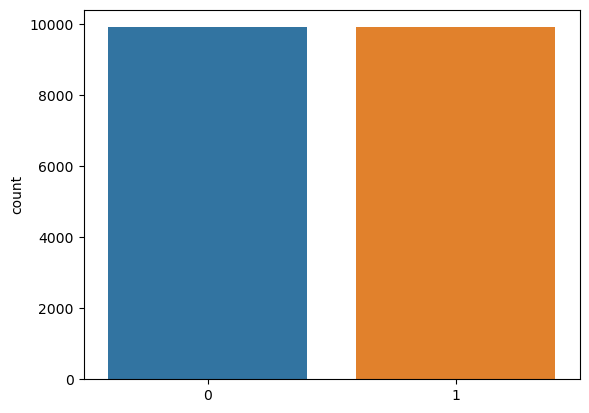

In [120]:
sns.countplot(y)

#### We can see the data we have now is better balanced

## BIFIRCATING THE DATA INTO TEST AND TRAIN DATA

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state =42)

# CLASSIFICATION ALGORITHMS 

## 1. LOGISTIC REGRESSION

In [122]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 42, solver='lbfgs',max_iter = 100, penalty = 'l2')
LR.fit(x_train,y_train)

y_pred = LR.predict(x_test)

LR.score(x_train,y_train)

0.9073232323232323

In [123]:
LR.score(x_test,y_test)

0.9146464646464646

In [124]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1867,  140],
       [ 198, 1755]], dtype=int64)

In [125]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9146464646464646
Precision: 0.9261213720316622
Recall: 0.8986175115207373


In [126]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2007
           1       0.93      0.90      0.91      1953

    accuracy                           0.91      3960
   macro avg       0.92      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



### TUNNING THE MODEL
#### Tune the model using grid search CV to fing the best parameteres

In [127]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(random_state=42), {
    'C': [1,10,20],
    'solver':['sag','lbfgs']
}, cv=5, return_train_score=False)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 10, 20], 'solver': ['sag', 'lbfgs']})

In [128]:
clf.best_params_

{'C': 1, 'solver': 'sag'}

#### REPLACING USING THE BEST PARAMETERS

In [129]:
New_LR = LogisticRegression(C= 1, solver='sag')
New_LR.fit(x_train,y_train)
New_LR.score(x_test,y_test)

0.9146464646464646

In [130]:
New_LR.score(x_train,y_train)

0.9073232323232323

## 2. DESCISION TREE

In [131]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x,y)
y_pred =clf.predict(x_test)

### USING GINI

In [132]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_true=y_train, y_pred=clf.predict(x_train))
accuracy_train  

0.901010101010101

In [133]:
accuracy_test = accuracy_score(y_true=y_test, y_pred=clf.predict(x_test))
accuracy_test

0.9138888888888889

### USING ENTHROPY

In [134]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth=2)
clf_entropy = clf.fit(x,y)
y_pred =clf_entropy.predict(x_test)

In [135]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_true=y_train, y_pred=clf_entropy.predict(x_train))
accuracy_train 

0.901010101010101

In [136]:
accuracy_test = accuracy_score(y_true=y_test, y_pred=clf_entropy.predict(x_test))
accuracy_test  

0.9138888888888889

In [137]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) 
cm

array([[1942,   65],
       [ 276, 1677]], dtype=int64)

In [138]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2007
           1       0.96      0.86      0.91      1953

    accuracy                           0.91      3960
   macro avg       0.92      0.91      0.91      3960
weighted avg       0.92      0.91      0.91      3960



## 3. RANDOM FOREST CLASSIFIER

In [139]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [140]:
y_predicted = model.predict(x_test)

In [141]:
model.score(x_test, y_test)

0.951010101010101

In [142]:
model.score(x_train,y_train)

0.9982323232323232

In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1926,   81],
       [ 113, 1840]], dtype=int64)

In [144]:
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2007
           1       0.96      0.94      0.95      1953

    accuracy                           0.95      3960
   macro avg       0.95      0.95      0.95      3960
weighted avg       0.95      0.95      0.95      3960



### COMPARING THE DIFFERENT MODELS WE SEE


|No.|ALGORITHM USED| TRAIN ACCURACY| TEST ACCURACY|
|---|---------------------|--------|--------------|
|**1.** |**LOGISTIC REGRESSOR**  | **0.9031** | **0.9131** |
|**2.**|**DECISION TREE CLASSIFIER**  | **0.9031** | **0.9131**|
|**3.**|**RANDOM FOREST CLASSIFIER**  | **0.9977** | **0.9520**|

#### COMPARING THE ACCURACY OF ALL THE MODELS --

      1. IN LOGISTIC REGRESSOR -         WE CAN SEE A SMALL CASE OF OVERFITTING AS THE TEST IS GREATER THAN TRAIN ACCURACY
      2. IN DECISION TREE CLASSIFIER -   WE CAN SIMILARLY SEE A CASE OF LITTLE OVERFITTING
      3. IN RANDOM FOREST CLASSIFIER -   WE CAN SEE THE TEST AND TRAIN IS HIGH AND PERFECTLY FIT IN TOO.
      
#### Comparing the model's confusion matrix and classification report
     1. LOGISTIC REGRESSION : We see the f1 score is 92 and 91
     2. DECISION TREE CLASSIFIER : We see the F1 score is 92 and 91 
     3. RANDOM FOREST CLASSIFIER : We see the F1 score is 95 and 95
     
     Hence we can see here, that the random forest classifier is able to recall and be precise about the predictions the most compared to the other 2 classifiers
      
#### HENCE THE BEST ALGORITHM TO USE WILL BE :
###  <u> THE RANDOM FOREST CLASSIFIER </u>


#### THIS MODEL CAN BE USED DURING: 
    1. Hiring Time
    2. Internal Promotions or Hikes
    3. To predict attrition and work on retention
